In [19]:
import pandas as pd

penguins_df = pd.read_csv('penguins.csv')

In [20]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [21]:
average_mass_by_sex = penguins_df.groupby(['sex', 'species'])['body_mass_g'].mean().reset_index()
average_mass_by_sex

,sex,species,body_mass_g
0,female,Adelie,3368.835616
1,female,Chinstrap,3527.205882
2,female,Gentoo,4679.741379
3,male,Adelie,4043.493151
4,male,Chinstrap,3938.970588
5,male,Gentoo,5484.836066


In [22]:
average_flipper_length_by_sex = penguins_df.groupby(['sex', 'species'])['flipper_length_mm'].mean().reset_index()
average_flipper_length_by_sex

,sex,species,flipper_length_mm
0,female,Adelie,187.794521
1,female,Chinstrap,191.735294
2,female,Gentoo,212.706897
3,male,Adelie,192.410959
4,male,Chinstrap,199.911765
5,male,Gentoo,221.540984


In [23]:
average_bill_depth_by_sex = penguins_df.groupby(['sex', 'species'])['bill_depth_mm'].mean().reset_index()
average_bill_depth_by_sex

,sex,species,bill_depth_mm
0,female,Adelie,17.621918
1,female,Chinstrap,17.588235
2,female,Gentoo,14.237931
3,male,Adelie,19.072603
4,male,Chinstrap,19.252941
5,male,Gentoo,15.718033


In [24]:
average_bill_length_by_sex = penguins_df.groupby(['sex', 'species'])['bill_length_mm'].mean().reset_index()
average_bill_length_by_sex

,sex,species,bill_length_mm
0,female,Adelie,37.257534
1,female,Chinstrap,46.573529
2,female,Gentoo,45.563793
3,male,Adelie,40.390411
4,male,Chinstrap,51.094118
5,male,Gentoo,49.473770


In [25]:
def male_or_female(species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g):
    difference = {'male': 0, 'female': 0}
    for sex in ['male', 'female']:
        key = (species, sex)
        if key in average_mass_by_sex:
            avg_mass = average_mass_by_sex[(average_mass_by_sex['species']==key[0])&(average_mass_by_sex['sex']==key[1])]
            difference[sex] = abs(body_mass_g - avg_mass)

    predicted_sex = min(difference, key=difference.get) 
    return predicted_sex   

In [26]:
def male_or_female2(species, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g):
    difference = {'male': 0, 'female': 0}
    for sex in ['male', 'female']:
        # For body mass
        avg_mass = average_mass_by_sex[(average_mass_by_sex['species'] == species) & 
                                       (average_mass_by_sex['sex'] == sex)]['body_mass_g'].values[0]
        difference[sex] += abs(body_mass_g - avg_mass)
        
        # For flipper length
        avg_flipper_length = average_flipper_length_by_sex[(average_flipper_length_by_sex['species'] == species) & 
                                                            (average_flipper_length_by_sex['sex'] == sex)]['flipper_length_mm'].values[0]
        difference[sex] += abs(flipper_length_mm - avg_flipper_length)
        
        # For bill depth
        avg_bill_depth = average_bill_depth_by_sex[(average_bill_depth_by_sex['species'] == species) & 
                                                   (average_bill_depth_by_sex['sex'] == sex)]['bill_depth_mm'].values[0]
        difference[sex] += abs(bill_depth_mm - avg_bill_depth)
        
        # For bill length
        avg_bill_length = average_bill_length_by_sex[(average_bill_length_by_sex['species'] == species) & 
                                                     (average_bill_length_by_sex['sex'] == sex)]['bill_length_mm'].values[0]
        difference[sex] += abs(bill_length_mm - avg_bill_length)
        
    # Predicting sex based on the smallest difference
    predicted_sex = min(difference, key=difference.get) 
    return predicted_sex

In [17]:
def fill_missing_sex(row):
    # Assuming the 'species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', and 'body_mass_g'
    # columns exist in your DataFrame
    if pd.isna(row['sex']):
        return male_or_female2(row['species'], row['bill_length_mm'], row['bill_depth_mm'],
                              row['flipper_length_mm'], row['body_mass_g'])
    else:
        return row['sex']

In [27]:
penguins_df['sex'] = penguins_df.apply(fill_missing_sex, axis=1)

In [31]:
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,male,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [32]:
penguins_df.drop_duplicates(inplace=True)

In [33]:
penguins_df.dropna(inplace=True)

Exploratory Data Analysis (EDA):

Use Pandas to summarize the key statistics of the dataset.
Identify unique values, ranges, and distribution of data.

In [34]:
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [36]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.0+ KB


In [35]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,5.459584,1.974793,14.061714,801.954536,0.817168
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [37]:
penguins_df['bill_depth_mm'].unique()

array([18.7, 17.4, 18. , 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1, 17.3,
       17.6, 21.2, 21.1, 19. , 20.7, 18.4, 21.5, 18.3, 19.2, 17.2, 18.9,
       18.6, 17.9, 16.7, 17. , 20. , 18.5, 19.1, 19.7, 16.9, 18.8, 17.7,
       19.5, 17.5, 16.6, 18.2, 16.2, 19.4, 16.8, 16.1, 20.3, 16. , 16.5,
       20.5, 19.8, 15.9, 20.1, 15.5, 13.2, 16.3, 14.1, 15.2, 14.5, 13.5,
       14.6, 15.3, 13.4, 15.4, 13.7, 15.7, 15.1, 14.3, 15.8, 13.1, 15. ,
       14.2, 14.8, 13.6, 13.9, 13.3, 14.4, 13.8, 14.9, 15.6, 16.4, 14. ,
       14.7, 19.9, 20.8])

In [38]:
penguins_df['flipper_length_mm'].unique()

array([181., 186., 195., 193., 190., 180., 182., 191., 198., 185., 197.,
       184., 194., 174., 189., 187., 183., 172., 178., 188., 196., 179.,
       200., 192., 202., 205., 208., 203., 199., 176., 210., 201., 211.,
       230., 218., 215., 219., 209., 214., 216., 213., 217., 221., 222.,
       220., 207., 225., 224., 231., 229., 223., 212., 228., 226., 206.])

In [39]:
penguins_df['bill_length_mm'].unique()

array([39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 34.1, 42. , 37.8, 41.1,
       38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46. , 37.7, 35.9, 38.2, 38.8,
       35.3, 40.6, 40.5, 37.9, 37.2, 40.9, 36.4, 42.2, 37.6, 39.8, 36.5,
       40.8, 36. , 44.1, 37. , 39.6, 37.5, 42.3, 40.1, 35. , 34.5, 41.4,
       39. , 35.7, 41.3, 41.6, 35.5, 41.8, 33.5, 39.7, 45.8, 42.8, 36.2,
       42.1, 42.9, 35.1, 37.3, 36.3, 36.9, 38.3, 34. , 38.1, 33.1, 43.2,
       41. , 45.6, 42.7, 40.2, 35.2, 41.5, 38.5, 43.1, 36.8, 35.6, 32.1,
       40.7, 46.1, 50. , 48.7, 47.6, 46.5, 45.4, 46.7, 43.3, 46.8, 49. ,
       45.5, 48.4, 49.3, 49.2, 46.2, 50.2, 45.1, 46.3, 44.5, 47.8, 48.2,
       47.3, 59.6, 49.1, 42.6, 44.4, 44. , 49.6, 45.3, 50.5, 43.6, 44.9,
       45.2, 46.6, 48.5, 50.1, 45. , 43.8, 50.4, 45.7, 54.3, 49.8, 49.5,
       43.5, 50.7, 47.7, 46.4, 48.6, 47.5, 51.1, 52.5, 47.4, 50.8, 43.4,
       51.3, 52.1, 52.2, 49.4, 46.9, 55.9, 47.2, 41.7, 53.4, 48.1, 51.5,
       55.1, 48.8, 49.9, 52.7, 51.7, 47. , 52. , 45

In [40]:
penguins_df['body_mass_g'].unique()

array([3750., 3800., 3250., 3450., 3650., 3625., 4675., 3475., 4250.,
       3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400., 3600.,
       3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000., 4600.,
       3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350., 4100.,
       3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075., 2925.,
       3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275., 4475.,
       3975., 5700., 5400., 4550., 4800., 5200., 5150., 5550., 5850.,
       6300., 5350., 5000., 5050., 5100., 5650., 5250., 6050., 4950.,
       4750., 4900., 5300., 4850., 5800., 6000., 5950., 4625., 5450.,
       5600., 4875., 4925., 4975., 5500., 4575., 4375., 5750., 3525.,
       3575., 3850., 2700., 3675.])

In [41]:
penguins_df['year'].unique()

array([2007, 2008, 2009], dtype=int64)

In [42]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [44]:
min_val_bl = penguins_df['bill_length_mm'].min()
max_val_bl = penguins_df['bill_length_mm'].max()
print(f'The range of "bill_length_mm": {min_val_bl}-{max_val_bl}')
min_val_bd = penguins_df['bill_depth_mm'].min()
max_val_bd = penguins_df['bill_depth_mm'].max()
print(f'The range of "bill_depth_mm": {min_val_bd}-{max_val_bd}')
min_val_fl = penguins_df['flipper_length_mm'].min()
max_val_fl = penguins_df['flipper_length_mm'].max()
print(f'The range of "flipper_length_mm": {min_val_fl}-{max_val_fl}')
min_val_bm = penguins_df['body_mass_g'].min()
max_val_bm = penguins_df['body_mass_g'].max()
print(f'The range of "body_mass_g": {min_val_bm}-{max_val_bm}')


The range of "bill_length_mm": 32.1-59.6
The range of "bill_depth_mm": 13.1-21.5
The range of "flipper_length_mm": 172.0-231.0
The range of "body_mass_g": 2700.0-6300.0


array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

<Figure size 2500x1000 with 0 Axes>

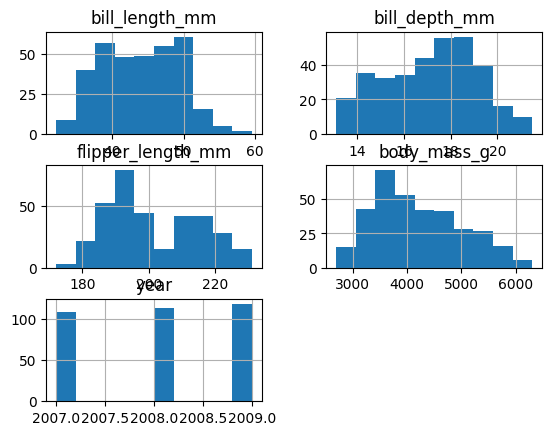

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 10))
penguins_df.hist()

Visualization Tasks:

Species Distribution: Use a bar chart to show the distribution of penguin species.

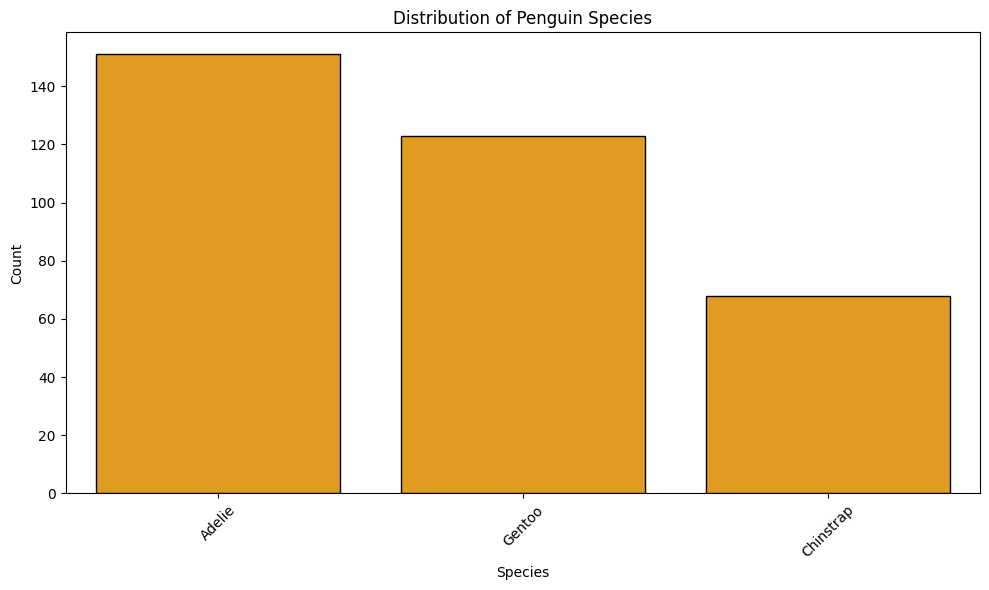

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.countplot(data=penguins_df, x='species',color='orange',edgecolor='black')

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Penguin Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


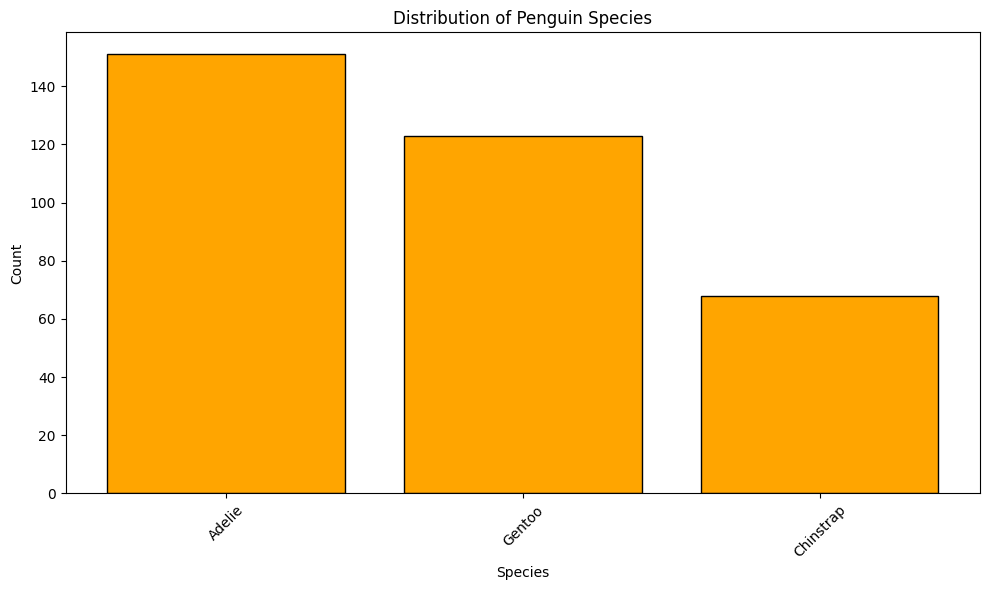

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
species_counts = penguins_df['species'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(species_counts.index, species_counts.values,color='orange',edgecolor='black')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Penguin Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

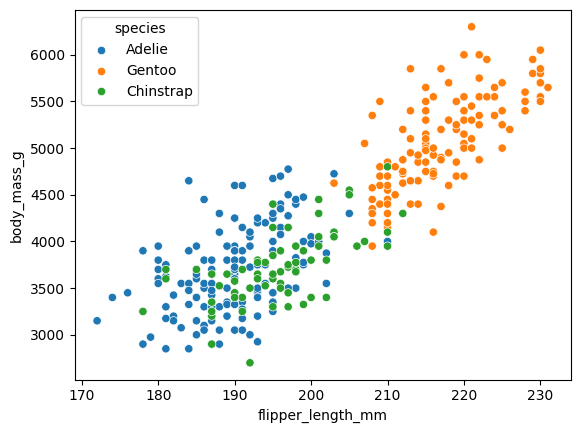

In [66]:
sns.scatterplot(data=penguins_df,x='flipper_length_mm',y='body_mass_g',hue='species')

Island Distribution: Visualize the count of penguins on each island using a pie chart.

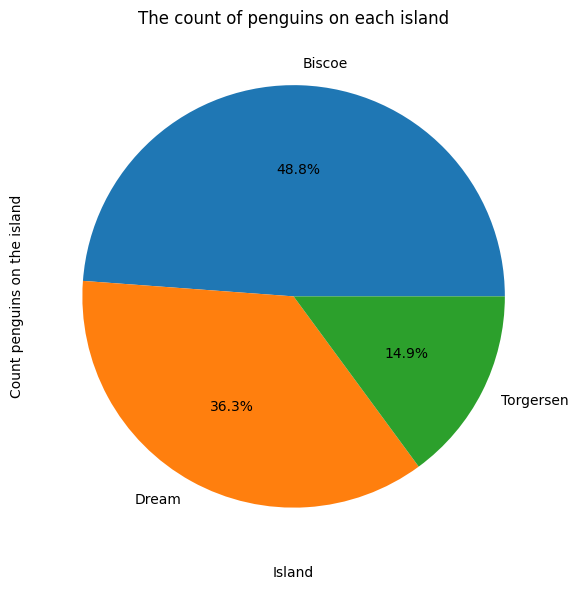

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
peng_count_island = penguins_df['island'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(peng_count_island, labels=peng_count_island.index, autopct='%1.1f%%')
plt.xlabel('Island')
plt.ylabel('Count penguins on the island')
plt.title('The count of penguins on each island')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.

In [77]:
sex_by_species_count = penguins_df.groupby(['species','sex']).size().unstack()
sex_by_species_count

sex,female,male
species,,
Adelie,73,78
Chinstrap,34,34
Gentoo,58,65


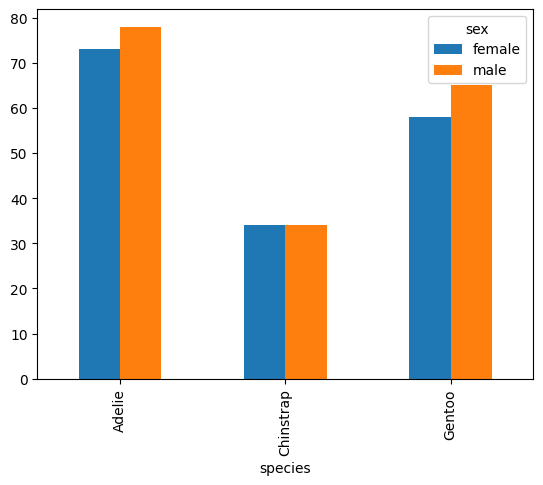

In [78]:
sex_by_species_count.plot(kind='bar',stacked=False)
plt.show()

Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.

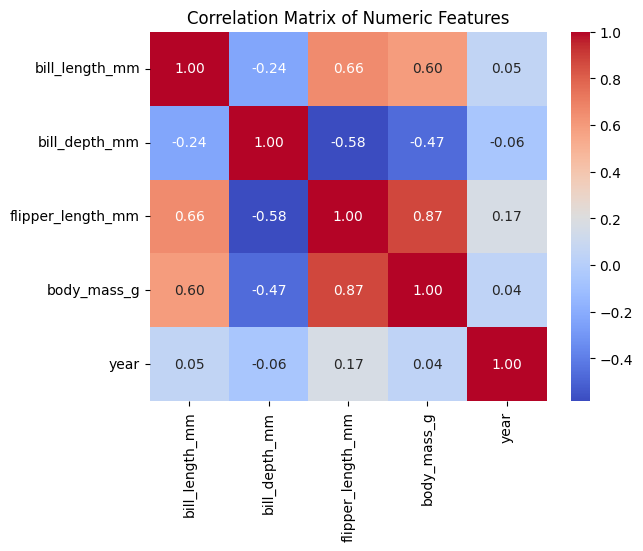

In [81]:
numeric_columns = penguins_df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.

In [82]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


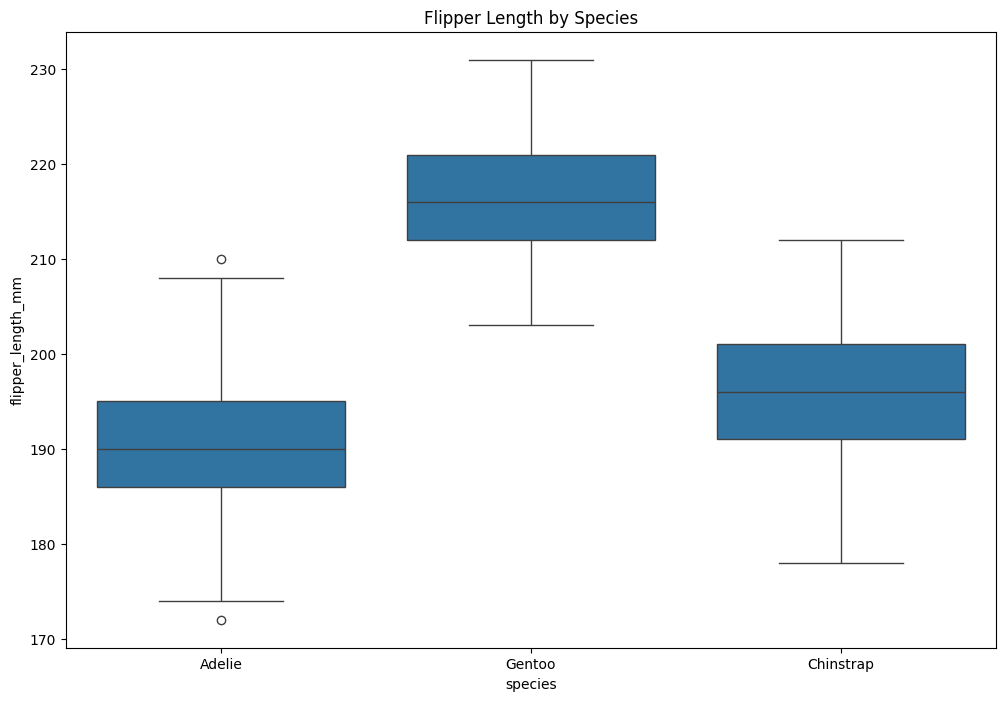

In [84]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=penguins_df, x='species', y='flipper_length_mm')
plt.title('Flipper Length by Species')

plt.show()

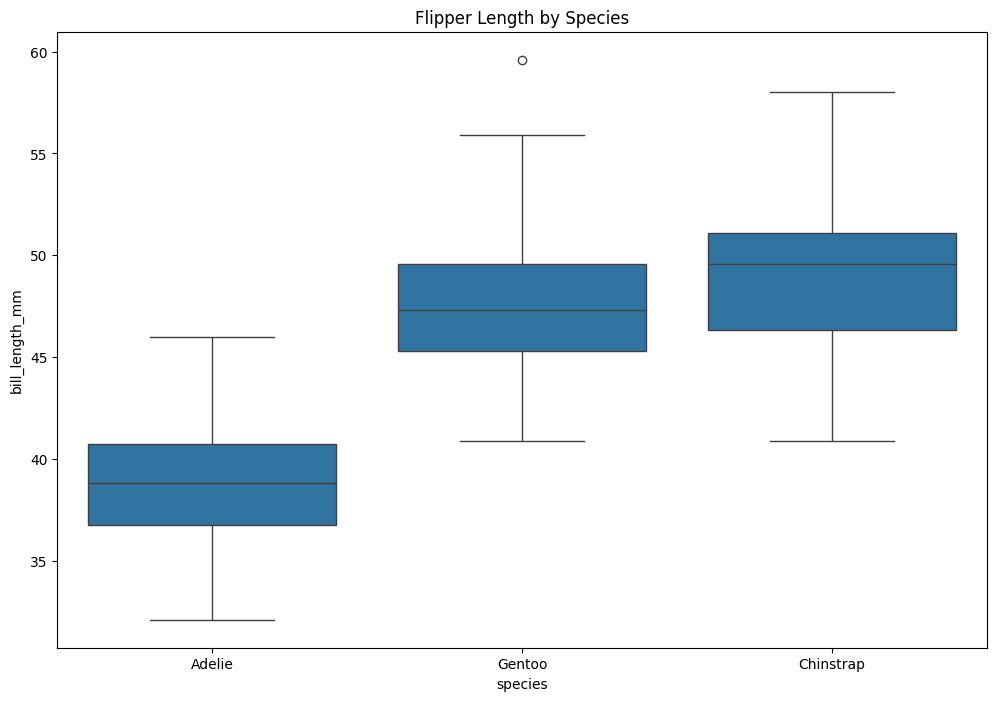

In [85]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=penguins_df, x='species', y='bill_length_mm')
plt.title('Flipper Length by Species')

plt.show()

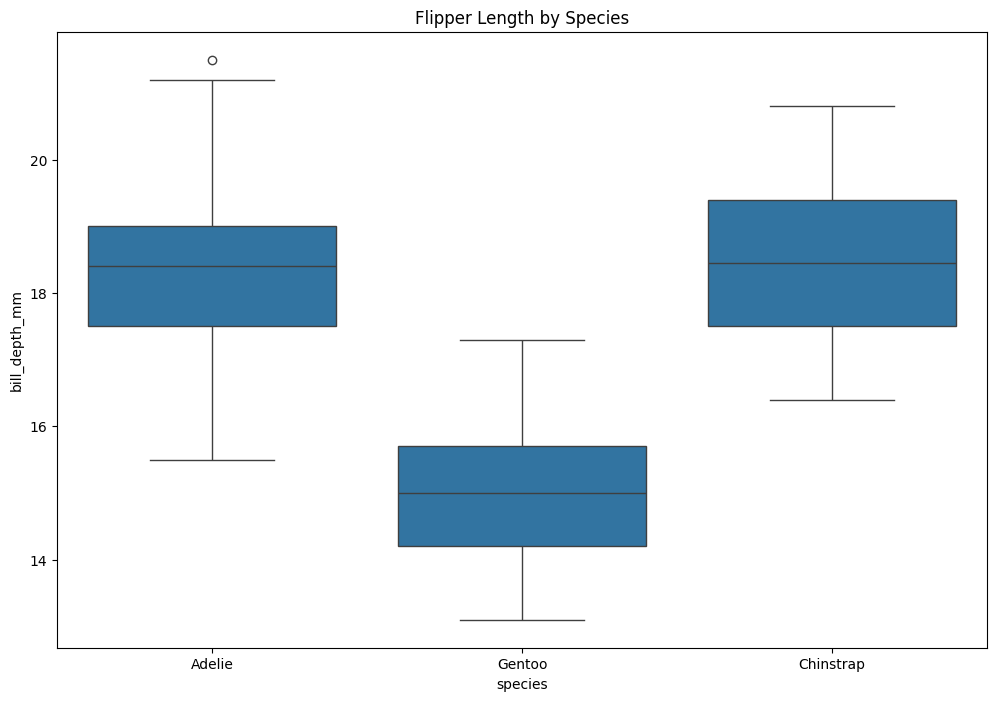

In [86]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=penguins_df, x='species', y='bill_depth_mm')
plt.title('Flipper Length by Species')

plt.show()

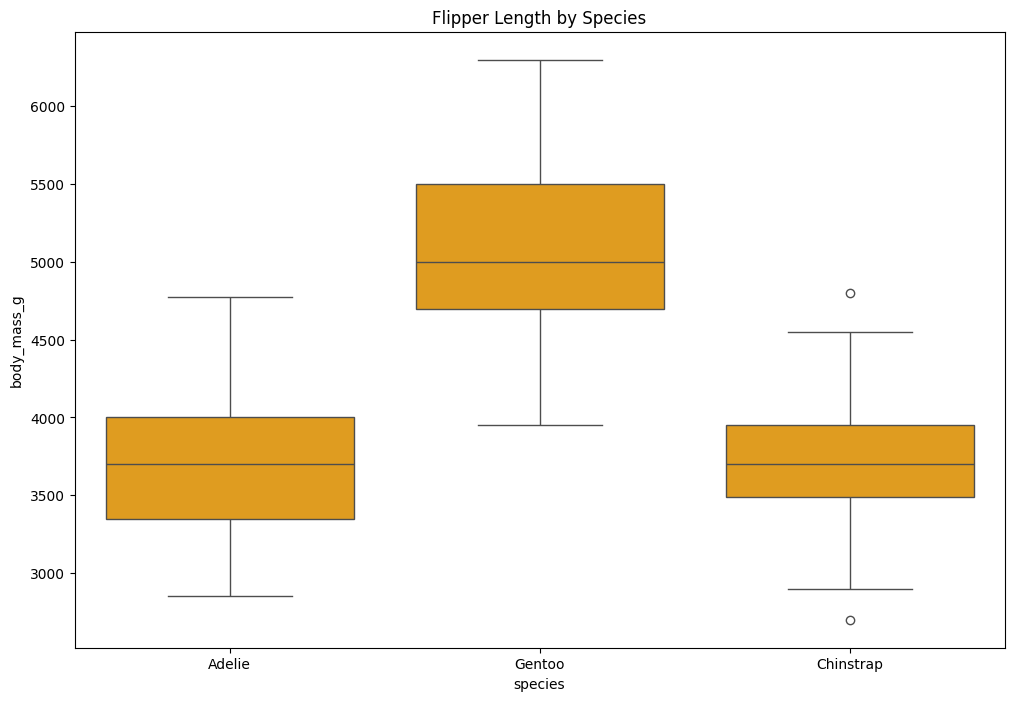

In [88]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=penguins_df, x='species', y='body_mass_g',color='orange')
plt.title('Flipper Length by Species')

plt.show()

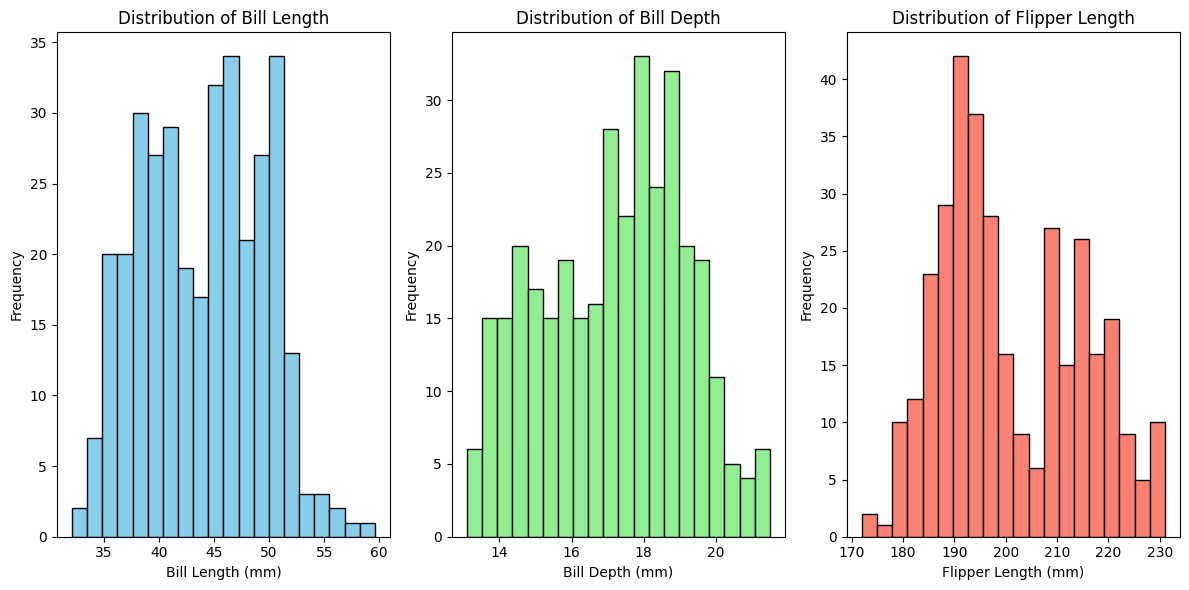

In [89]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create histograms for bill length
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
plt.hist(penguins_df['bill_length_mm'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Length')

# Create histograms for bill depth
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
plt.hist(penguins_df['bill_depth_mm'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Depth')

# Create histograms for flipper length
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.hist(penguins_df['flipper_length_mm'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Flipper Length')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


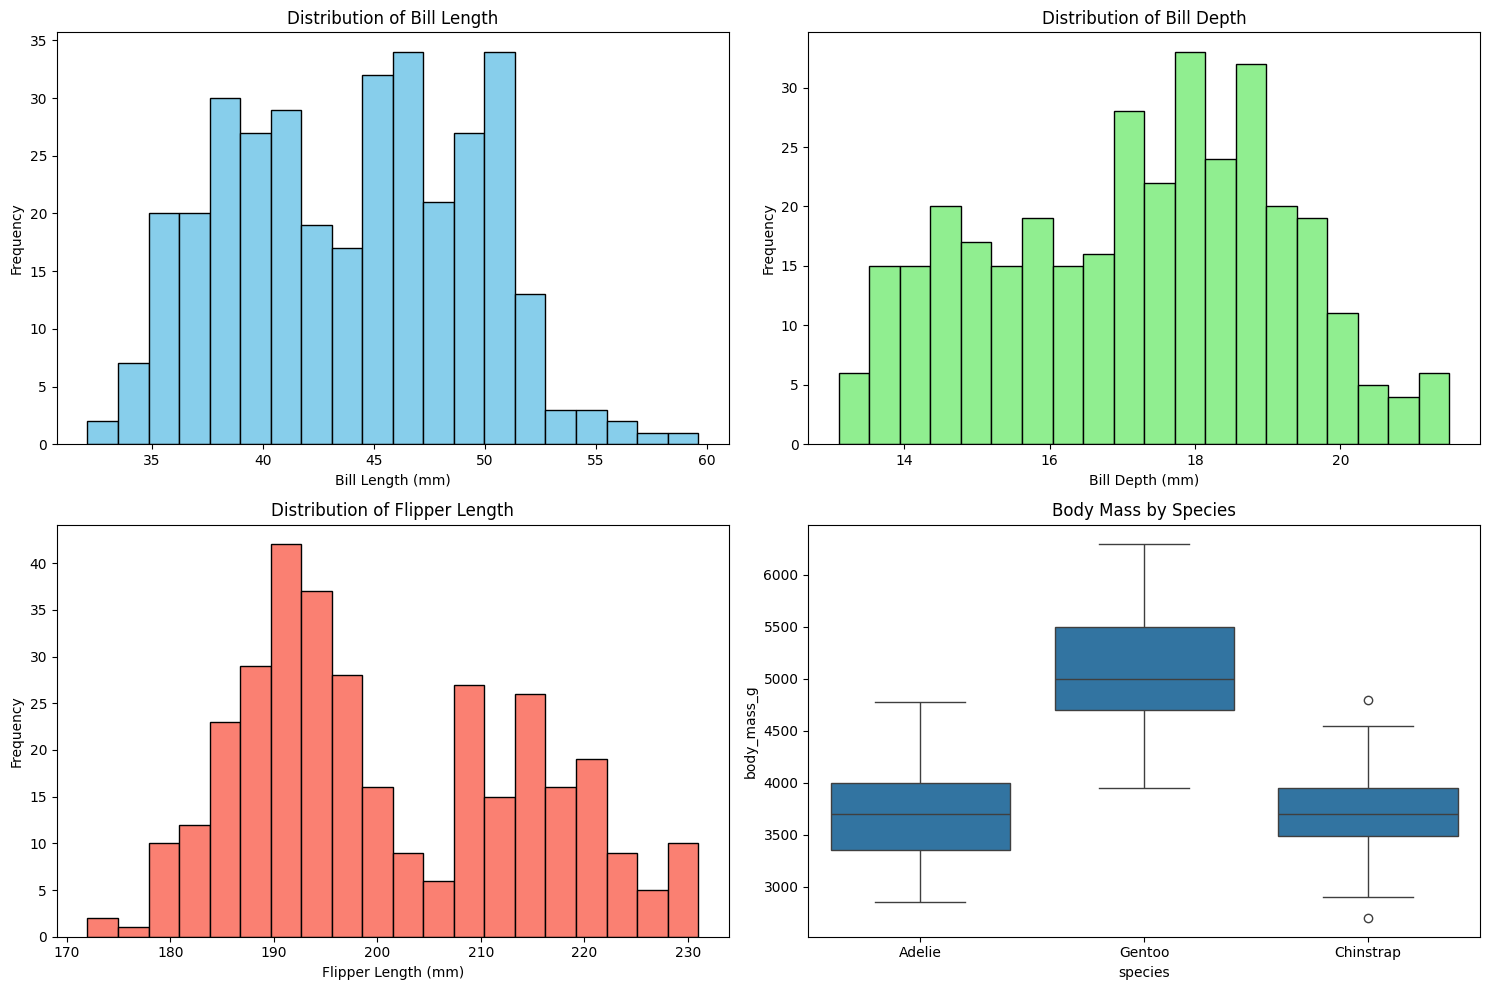

In [94]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create subplots for histograms
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.hist(penguins_df['bill_length_mm'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Length')

plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.hist(penguins_df['bill_depth_mm'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Depth')

plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
plt.hist(penguins_df['flipper_length_mm'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Flipper Length')

# Create subplots for boxplots
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.boxplot(data=penguins_df, x='species', y='body_mass_g')
#sns.scatterplot(data=penguins_df,x='flipper_length_mm',y='body_mass_g',hue='species')
plt.title('Body Mass by Species')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


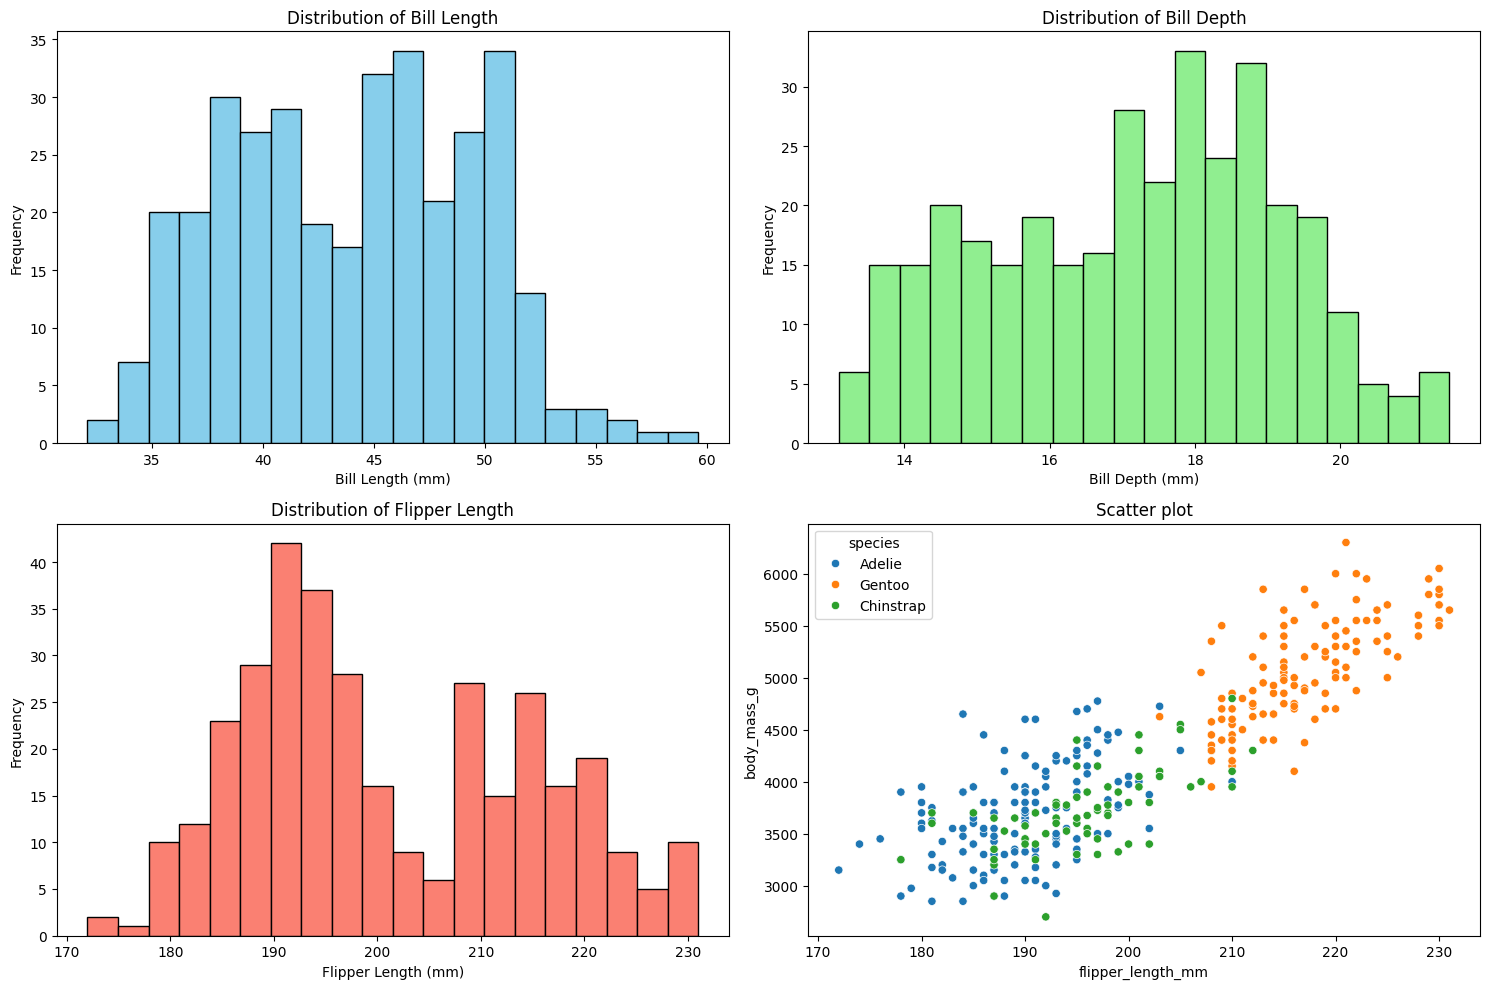

In [95]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create subplots for histograms
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.hist(penguins_df['bill_length_mm'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Length')

plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.hist(penguins_df['bill_depth_mm'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Bill Depth')

plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
plt.hist(penguins_df['flipper_length_mm'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Flipper Length')

# Create subplots for boxplots
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.scatterplot(data=penguins_df,x='flipper_length_mm',y='body_mass_g',hue='species')
plt.title('Scatter plot')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [100]:
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [103]:
penguins_df.drop(columns='year',inplace=True)

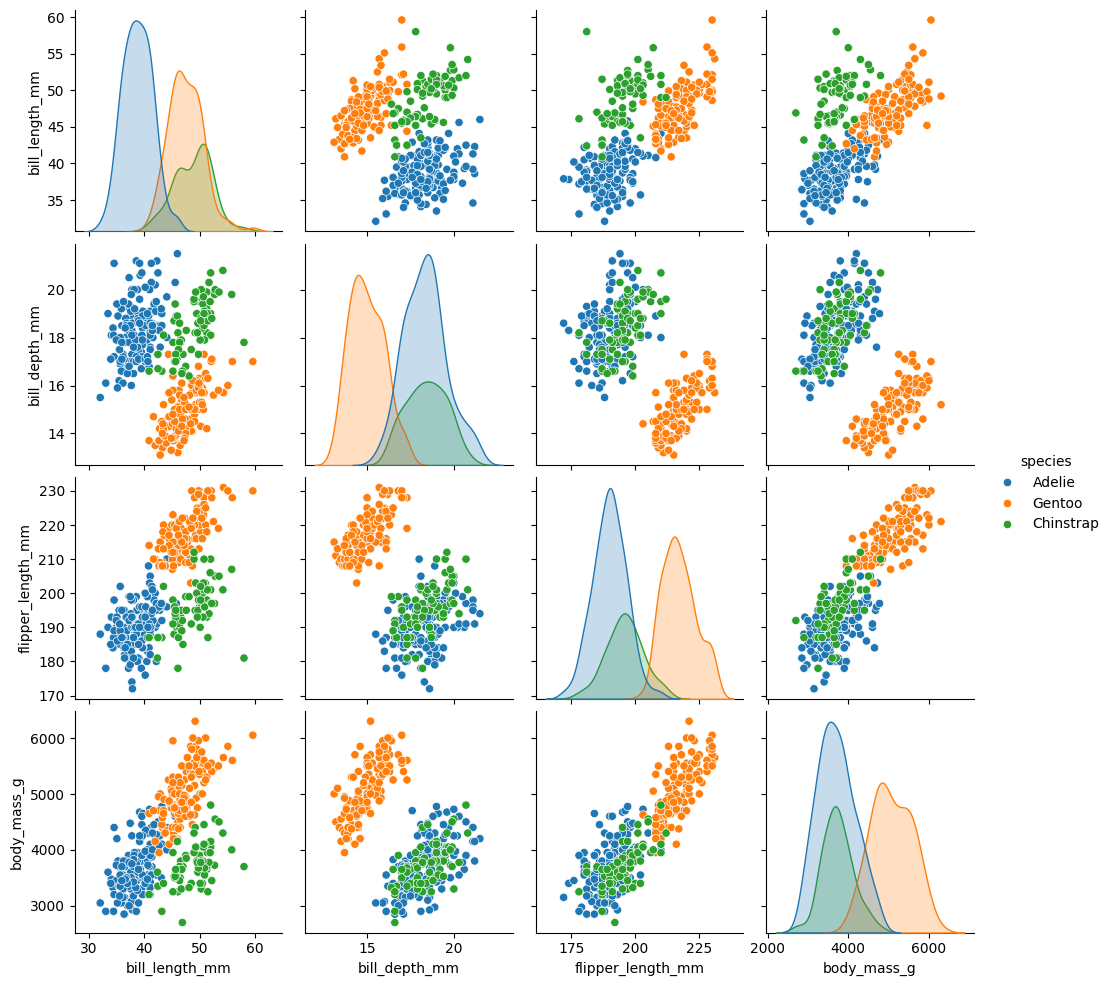

In [104]:
import seaborn as sns

# Plotting pairwise relationships
sns.pairplot(penguins_df,hue='species')
plt.show()

There is a big difference between 